In [1]:
pwd

'/home/wsuser/work'

# Load The Image Dataset

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='vfSavPBs4dr6y0MthK5-zX9QpPjUHvn4xXCscYxp17ff',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'fertilizerrecommendationsystem-donotdelete-pr-99w9ja4bft1njd'
object_key = 'Fertilizers_Recommendation_ System_For_Disease_ Prediction.zip'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


# Unzip The Folder

In [3]:
from io import BytesIO
import zipfile 
unzip = zipfile.ZipFile(BytesIO(streaming_body_2.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [4]:
ls

'Dataset Plant Disease'/   fruit.h5   fruit.tar.gb   Fruit-training.tgz


In [5]:
pwd

'/home/wsuser/work'

# Image Augmentation

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
ls

'Dataset Plant Disease'/   fruit.h5   fruit.tar.gb   Fruit-training.tgz


In [9]:
pwd

'/home/wsuser/work'

In [10]:
x_train = train_datagen.flow_from_directory(r"/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set",target_size = (128,128),batch_size=16,class_mode = 'categorical')
x_test = test_datagen.flow_from_directory(r"/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set",target_size = (128,128),batch_size=16,class_mode = 'categorical')

Found 11386 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


In [11]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

# CNN

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [13]:
model = Sequential()

In [14]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
model.add(Flatten())

# Hidden Layers

In [17]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(75,activation='relu'))

# Output Layer

In [18]:
model.add(Dense(9,activation = 'softmax'))

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 300)               38102700  
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 75)                11325     
                                                        

In [21]:
model.fit_generator(x_train,steps_per_epoch=50,epochs=16,validation_data=x_test,validation_steps=27)

/tmp/wsuser/ipykernel_1205/1962267347.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=50,epochs=16,validation_data=x_test,validation_steps=27)


Epoch 1/16
50/50 [==============================] - 21s 416ms/step - loss: 3.2094 - accuracy: 0.1963 - val_loss: 1.8731 - val_accuracy: 0.3056
Epoch 2/16
50/50 [==============================] - 21s 415ms/step - loss: 1.7582 - accuracy: 0.3850 - val_loss: 1.6156 - val_accuracy: 0.3819
Epoch 3/16
50/50 [==============================] - 22s 444ms/step - loss: 1.4961 - accuracy: 0.4613 - val_loss: 1.6190 - val_accuracy: 0.3588
Epoch 4/16
50/50 [==============================] - 22s 429ms/step - loss: 1.2910 - accuracy: 0.5450 - val_loss: 1.4349 - val_accuracy: 0.4699
Epoch 5/16
50/50 [==============================] - 22s 442ms/step - loss: 1.1862 - accuracy: 0.5875 - val_loss: 1.1120 - val_accuracy: 0.6227
Epoch 6/16
50/50 [==============================] - 22s 446ms/step - loss: 1.1320 - accuracy: 0.6020 - val_loss: 1.1074 - val_accuracy: 0.6065
Epoch 7/16
50/50 [==============================] - 21s 420ms/step - loss: 1.1040 - accuracy: 0.6150 - val_loss: 0.8954 - val_accuracy: 0.7083

# Saving The Model

In [22]:
model.save("vegetable.h5")

In [23]:
ls

'Dataset Plant Disease'/   fruit.tar.gb         vegetable.h5
 fruit.h5                  Fruit-training.tgz


# Testing The Model

In [24]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
#Load the model

model =load_model("vegetable.h5")

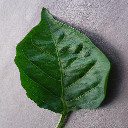

In [26]:
img = image.load_img(r"/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Pepper,_bell___healthy/0a3f2927-4410-46a3-bfda-5f4769a5aaf8___JR_HL 8275.JPG",target_size=(128,128))
img

In [27]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x),axis=1)

index=['Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot']

index[pred[0]]

'Pepper,_bell___healthy'

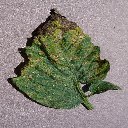

In [28]:
img = image.load_img(r"/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Septoria_leaf_spot/00f16858-f392-4d9e-ad9f-efab8049a13f___JR_Sept.L.S 8368.JPG",target_size=(128,128))
img

In [29]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x),axis=1)

index=['Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot']

index[pred[0]]

'Tomato___Septoria_leaf_spot'

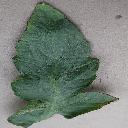

In [30]:
img = image.load_img(r"/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/0a6d40e4-75d6-4659-8bc1-22f47cdb2ca8___GCREC_Bact.Sp 6247.JPG",target_size=(128,128))
img

In [33]:
x=image.img_to_array(img)
x

array([[[144., 140., 141.],
        [149., 145., 146.],
        [151., 147., 148.],
        ...,
        [137., 131., 131.],
        [143., 137., 137.],
        [139., 133., 133.]],

       [[136., 132., 133.],
        [154., 150., 151.],
        [145., 141., 142.],
        ...,
        [132., 126., 126.],
        [138., 132., 132.],
        [145., 139., 139.]],

       [[145., 141., 142.],
        [150., 146., 147.],
        [153., 149., 150.],
        ...,
        [141., 135., 135.],
        [144., 138., 138.],
        [143., 137., 137.]],

       ...,

       [[180., 178., 179.],
        [185., 183., 184.],
        [180., 178., 179.],
        ...,
        [190., 188., 189.],
        [193., 191., 192.],
        [193., 191., 192.]],

       [[182., 180., 181.],
        [180., 178., 179.],
        [179., 177., 178.],
        ...,
        [192., 190., 191.],
        [195., 193., 194.],
        [193., 191., 192.]],

       [[179., 177., 178.],
        [181., 179., 180.],
        [184., 1

In [34]:
x=image.img_to_array(img)
x
x=np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x),axis=1)

index=['Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot']

index[pred[0]]

'Tomato___Septoria_leaf_spot'

# IBM Deployment

In [35]:
!pip install watson-machine-learning-client --upgrade

In [56]:
from ibm_watson_machine_learning import APIClient
wml_credentials= {
                    "url" : "https://us-south.ml.cloud.ibm.com",
                    "apikey" : "YRj76W9B-T02L7xBXGABoBMGN8yayfcJrW3G4TyQO0UD"
                }

In [57]:
client = APIClient(wml_credentials)

In [58]:
client

In [61]:
def guid_from_space_name(client,Vegetable):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == Vegetable)['metadata']['id'])

In [62]:
space_uid = guid_from_space_name(client,'Vegetable')
print("space UID = " + space_uid)

space UID = 39439f8d-cd64-404b-9336-1003e03a63a9


In [63]:
client.set.default_space(space_uid)

'SUCCESS'

In [64]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [65]:
#tensorflow_1.15-py3.6
software_space_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")

In [66]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [67]:
ls

'Dataset Plant Disease'/   fruit.tar.gb         vegetable.h5
 fruit.h5                  Fruit-training.tgz


In [68]:
!tar -zcvf vegetable-training.tgz vegetable.h5

vegetable.h5


In [69]:
ls

'Dataset Plant Disease'/   fruit.tar.gb         vegetable.h5
 fruit.h5                  Fruit-training.tgz   vegetable-training.tgz


In [70]:
model_details = client.repository.store_model(model= 'vegetable-training.tgz',
    meta_props={
        client.repository.ModelMetaNames.NAME:"CNN",
        client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
        client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid}
    )

In [71]:
model_id = client.repository.get_model_id(model_details)

In [72]:
model_id

'f10100b0-6d65-4ee8-b8e0-d4374ceb2e89'

In [73]:
client.repository.download(model_id,'vegetable.tar.gb')

Successfully saved model content to file: 'vegetable.tar.gb'


'/home/wsuser/work/vegetable.tar.gb'

In [74]:
ls

'Dataset Plant Disease'/   Fruit-training.tgz   vegetable-training.tgz
 fruit.h5                  vegetable.h5
 fruit.tar.gb              vegetable.tar.gb
